In [67]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import HeliocentricTrueEcliptic
from astropy.coordinates import BarycentricTrueEcliptic
from astropy.coordinates import ICRS
from astropy.coordinates import FK5
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
%matplotlib notebook

The **ICRS** frame is centered at the Solar System barycenter. It uses radio sources so it highly accurate.  It is aligned close to the mean equator and dynamical equinox of J2000.0 for continuity with previous fundamental reference systems.

**J2000** refers to the epoch at of 12 PM on Jan, 1, 2000. We use this as the typical epoch for observations these days. 

**FK5** is part of the “Catalogue of Fundamental Stars” and is the 5th catalog/refinement of the reference frame. Comes from optical sources. 


Other than extremely accurate astrometry (fractions of an arcsec), FK5 and ICRS are essentially identical. "The orientation of the ICRS axes is consistent with the equator and equinox of J2000.0 represented by the FK5, within the errors of the latter... Because of its consistency with previous reference systems, implementation of the ICRS will be transparent to any applications with accuracy requirements of no better than 0.1 arcseconds near
epoch J2000.0."(Kaplan et al. 2005; https://ui.adsabs.harvard.edu/abs/2005USNOC.179.....K/abstract)

From the astropy documentaton: "If you’re looking for **J2000** coordinates, and aren’t sure if you want to use this or **FK5**, you probably want to use **ICRS**. It’s more well-defined as a catalog coordinate and is an inertial system, and is very close (within tens of milliarcseconds) to J2000 equatorial." (https://docs.astropy.org/en/stable/api/astropy.coordinates.ICRS.html)


Let's set up the center of the galactic plane and +/- 10 degrees

In [65]:
gc = SkyCoord(l=np.arange(360)*u.degree, b=0*u.degree, frame='galactic')
g_10deg = SkyCoord(l=np.arange(360)*u.degree, b=10*u.degree, frame='galactic')
g_neg_10deg = SkyCoord(l=np.arange(360)*u.degree, b=-10*u.degree, frame='galactic')

In [69]:
gc[2].icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (267.57670602, -27.22403784)>

In [12]:
gc[2].fk5

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (267.5767138, -27.22403243)>

See, very litte difference between the ICRS and FK5

Let's get the ecliptic and +/- 10 degrees

In [73]:
ecliptic=SkyCoord(lon=np.arange(360)*u.deg, lat=0*u.deg,frame="barycentrictrueecliptic")
ecliptic_10_deg=SkyCoord(lon=np.arange(360)*u.deg, lat=10*u.deg,frame="barycentrictrueecliptic")
ecliptic_neg_10_deg=SkyCoord(lon=np.arange(360)*u.deg, lat=-10*u.deg,frame="barycentrictrueecliptic")


cvz[2].icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (1.83862946, 0.79696122)>

Let's plot in Cartesian map the right acension and declination in ICRS of the ecliptic plane and the galactic plane

<IPython.core.display.Javascript object>


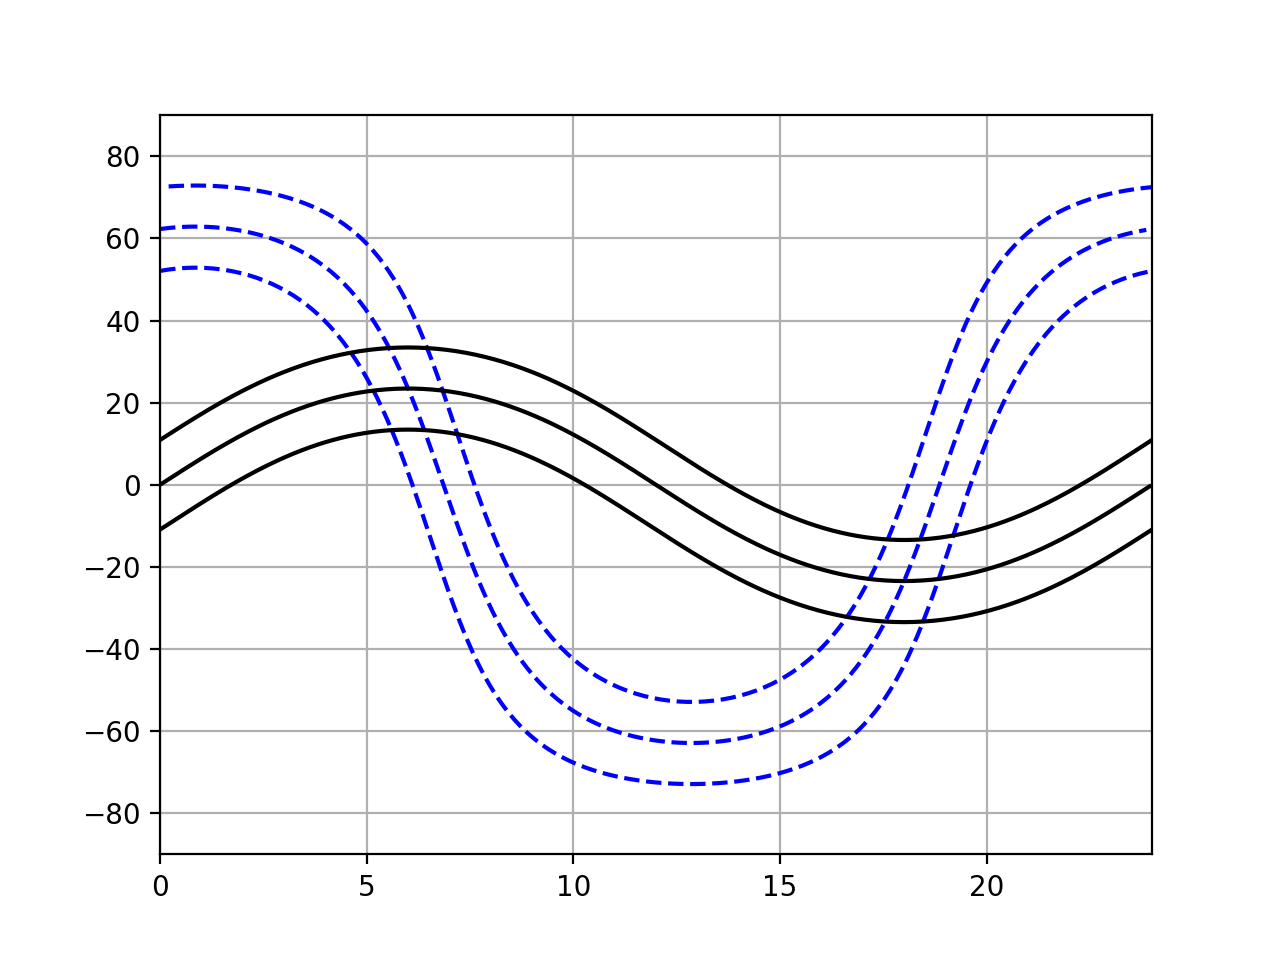

(-90.0, 90.0)

In [71]:
f=plt.figure()
# plot the galactic plane
ra=gc.icrs.ra
w=np.argsort(ra)
plt.plot(gc[w].icrs.ra.hour, gc[w].icrs.dec, '--',color='blue')
ra=g_10deg.icrs.ra
w=np.argsort(ra)
plt.plot(g_10deg[w].icrs.ra.hour, g_10deg[w].icrs.dec, '--', color='blue')
ra=g_neg_10deg.icrs.ra
w=np.argsort(ra)
plt.plot(g_neg_10deg[w].icrs.ra.hour, g_neg_10deg[w].icrs.dec, '--', color='blue')

# plot the ecliptic plane
ra=ecliptic.icrs.ra
w=np.argsort(ra)
plt.plot(ecliptic[w].icrs.ra.hour, ecliptic[w].icrs.dec, '-', color='black')
ra=ecliptic_10_deg.icrs.ra
w=np.argsort(ra)
plt.plot(ecliptic_10_deg[w].icrs.ra.hour, ecliptic_10_deg[w].icrs.dec, '-', color='black')
ra=ecliptic_neg_10_deg.icrs.ra
w=np.argsort(ra)
plt.plot(ecliptic_neg_10_deg[w].icrs.ra.hour, ecliptic_neg_10_deg[w].icrs.dec, '-', color='black')


plt.grid()
plt.xlim(0,24)
plt.ylim(-90,90)

Let's plot on a sphere. Some one thing to deal with is that we're plotting from inside the sphere looking outward, so we need to do some extra manipulation to get this to look correct. See https://astronomy.stackexchange.com/questions/39404/how-to-plot-celestial-equator-in-galactic-coordinates-why-does-my-plot-appear and https://astronomy.stackexchange.com/questions/36246/why-does-east-and-west-appear-to-be-mirrored-in-the-celestial-sphere

<IPython.core.display.Javascript object>


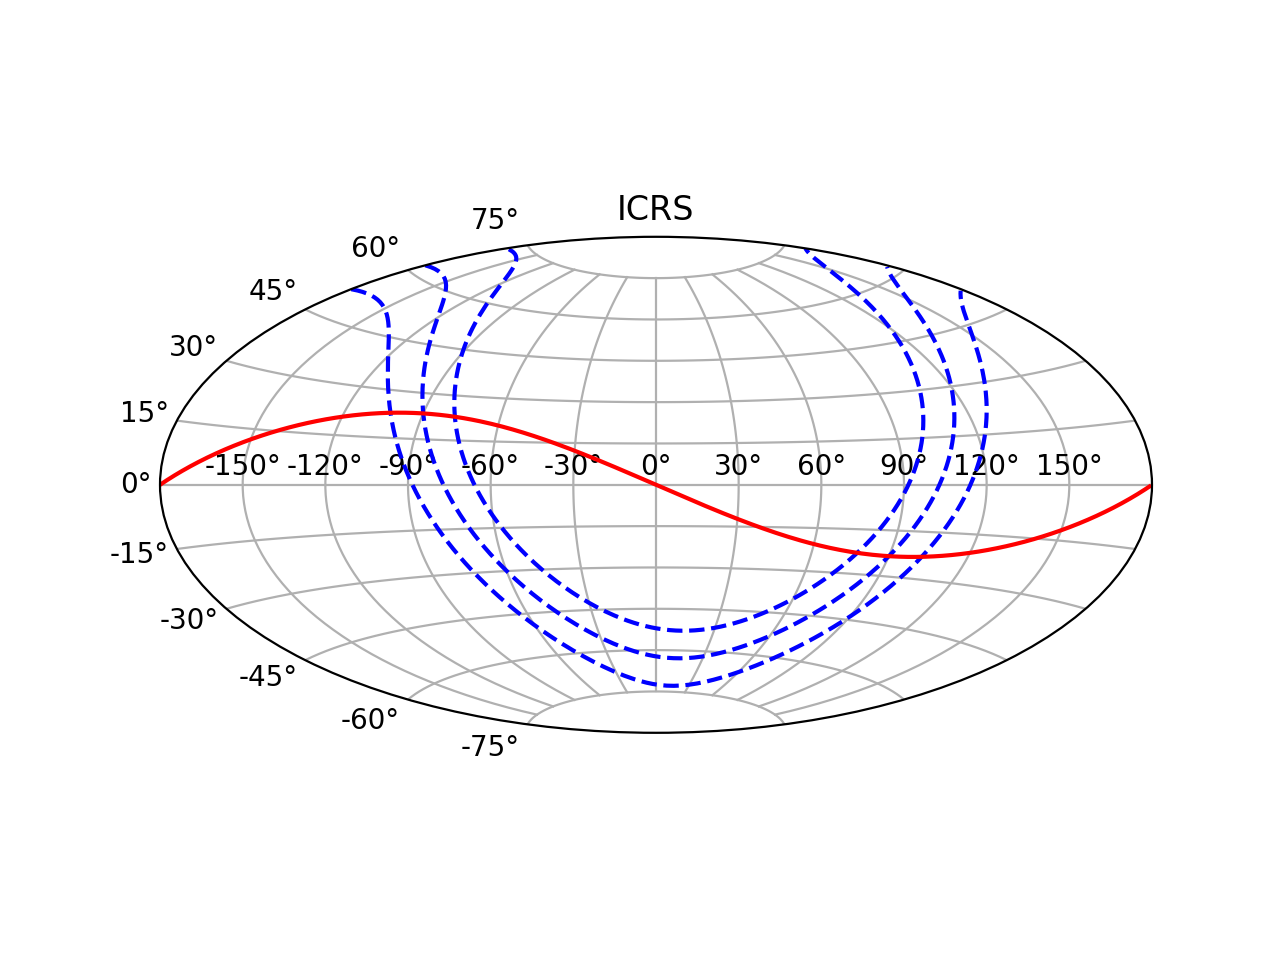

In [171]:
f=plt.figure()

ax=plt.subplot(111, projection="aitoff")

# plot the galactic plane

ra=gc.icrs.ra.radian - np.pi
w=np.argsort(ra)
plt.title("ICRS")
ax.plot(gc[w].icrs.ra.radian- np.pi, gc[w].icrs.dec.radian, '--',color='blue')

ra=g_10deg.icrs.ra.radian - np.pi
w=np.argsort(ra)
ax.plot(g_10deg[w].icrs.ra.radian- np.pi, g_10deg[w].icrs.dec.radian, '--',color='blue')
ra=g_neg_10deg.icrs.ra.radian - np.pi
w=np.argsort(ra)
ax.plot(g_neg_10deg[w].icrs.ra.radian- np.pi, g_neg_10deg[w].icrs.dec.radian, '--',color='blue')

# plot the ecliptic plane
ra=ecliptic.icrs.ra.radian- np.pi
w=np.argsort(ra)
ax.plot(ecliptic[w].icrs.ra.radian- np.pi, ecliptic[w].icrs.dec.radian, '-',color='red')
ax.grid()
